# Examining the Relationship between Poverty and Gun Violence in the United States

## 1. Introduction

With an average of more than 100 fatalities each day, gun violence in the United States has been a major and ongoing problem. Millions of Americans have been trying to make ends meet, making poverty a serious issue at the same time. Our proposed project is analyzing the relationship between poverty and gun violence at the national and state levels, and developing evidence-based policy recommendations to address poverty and gun violence.

## 2. Dataset preparation

Since we have already created a shared folder in Google Drive, we only need to mount our Google Drive in the runtime's virtual machine.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here, we import all the required libraries.

In [ ]:
import numpy as np 
import pandas as pd 
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from plotly.offline import init_notebook_mode, iplot

### (1) Gun Violence Data

Dataset summary:

The date in this dataset was downloaded from [gunviolencearchive.org](https://www.gunviolencearchive.org).The CSV file contains data for all recorded gun violence incidents in the US between January 2013 and March 2018. The data consist of 240k incidents, with detailed information about each incident.

In [ ]:
gun_df = pd.read_csv('/content/drive/MyDrive/SI 618/gun-violence-data_01-2013_03-2018.csv')

In [ ]:
print("Gun Violence Dimensions:",gun_df.shape)

Gun Violence Dimensions: (239677, 29)


First, let's take a look at the data.

In [ ]:
gun_df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [ ]:
gun_df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [ ]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

In [ ]:
gun_df.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


Then, we check NA values in dataframe.

In [ ]:
# Check NA values in dataframe
for i in gun_df.columns:
    # print(f'Column {i}')
    # print(gun_df[f'{i}'].isna().value_counts())
    if True in gun_df[f'{i}'].isna().value_counts():
        print(f"Column {i} (type: {gun_df.dtypes[f'{i}']}) has NA !!!")
    else:
        print(f"Column {i} (type: {gun_df.dtypes[f'{i}']})")

Column incident_id (type: int64)
Column date (type: object)
Column state (type: object)
Column city_or_county (type: object)
Column address (type: object) has NA !!!
Column n_killed (type: int64)
Column n_injured (type: int64)
Column incident_url (type: object)
Column source_url (type: object) has NA !!!
Column incident_url_fields_missing (type: bool)
Column congressional_district (type: float64) has NA !!!
Column gun_stolen (type: object) has NA !!!
Column gun_type (type: object) has NA !!!
Column incident_characteristics (type: object) has NA !!!
Column latitude (type: float64) has NA !!!
Column location_description (type: object) has NA !!!
Column longitude (type: float64) has NA !!!
Column n_guns_involved (type: float64) has NA !!!
Column notes (type: object) has NA !!!
Column participant_age (type: object) has NA !!!
Column participant_age_group (type: object) has NA !!!
Column participant_gender (type: object) has NA !!!
Column participant_name (type: object) has NA !!!
Column pa

Then, we drop some useless columns.

In [ ]:
gun_df.drop(['incident_id', 'address', 'incident_url', 'source_url', 'incident_url_fields_missing', 'congressional_district', 'incident_characteristics', 'latitude', 'location_description', 'longitude', 'notes', 'participant_name', 'participant_relationship', 'sources'], axis=1, inplace = True)
gun_df.head()

,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district
0,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,NaN,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,2013-01-01,California,Hawthorne,1,3,NaN,NaN,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,2013-01-05,Colorado,Aurora,4,0,NaN,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,2013-01-07,North Carolina,Greensboro,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0


After that, we add some new features.

In [ ]:
gun_df['date'] = pd.to_datetime(gun_df['date'])
gun_df['year'] = gun_df['date'].dt.year
gun_df['month'] = gun_df['date'].dt.month
gun_df['monthday'] = gun_df['date'].dt.day
gun_df['weekday'] = gun_df['date'].dt.weekday
gun_df['loss'] = gun_df['n_killed'] + gun_df['n_injured']
pd.set_option('display.max_columns', 30)
gun_df =  gun_df[gun_df['n_guns_involved'].notnull()]

Here, we convert state to state abbreviations.

In [ ]:
states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [ ]:
gun_df['state_code'] = gun_df['state'].apply(lambda x : states[x])

In [ ]:
gun_df.fillna('Unknown', inplace=True)

For the data, I stripped the special symbols.

In [ ]:
gun_df['gun_stolen'] = gun_df['gun_stolen'].str.replace('\|\|?[0-9]?[0-9]::?',',',regex=True)
gun_df['gun_stolen'] = gun_df['gun_stolen'].str.replace('[0-9]?[0-9]::?','',regex=True)
gun_df['gun_stolen'] = gun_df['gun_stolen'].str.split(',')
gun_df['gun_type'] = gun_df['gun_type'].str.replace('\|\|?[0-9]?[0-9]::?',',',regex=True)
gun_df['gun_type'] = gun_df['gun_type'].str.replace('[0-9]?[0-9]::?','',regex=True)
gun_df['gun_type'] = gun_df['gun_type'].str.split(',')
gun_df['participant_age'] = gun_df['participant_age'].str.replace('\|\|?[0-9]?[0-9]::?',',',regex=True)
gun_df['participant_age'] = gun_df['participant_age'].str.replace('[0-9]?[0-9]::?','',regex=True)
gun_df['participant_age'] = gun_df['participant_age'].str.split(',')
gun_df['participant_age_group'] = gun_df['participant_age_group'].str.replace('\|\|?[0-9]?[0-9]::?',',',regex=True)
gun_df['participant_age_group'] = gun_df['participant_age_group'].str.replace('[0-9]?[0-9]::?','',regex=True)
gun_df['participant_age_group'] = gun_df['participant_age_group'].str.split(',')
gun_df['participant_gender'] = gun_df['participant_gender'].str.replace('\|\|?[0-9]?[0-9]::?',',',regex=True)
gun_df['participant_gender'] = gun_df['participant_gender'].str.replace('[0-9]?[0-9]::?','',regex=True)
gun_df['participant_gender'] = gun_df['participant_gender'].str.split(',')
gun_df['participant_status'] = gun_df['participant_status'].str.replace('\|\|?[0-9]?[0-9]::?',',',regex=True)
gun_df['participant_status'] = gun_df['participant_status'].str.replace('[0-9]?[0-9]::?','',regex=True)
gun_df['participant_status'] = gun_df['participant_status'].str.split(',')
gun_df['participant_type'] = gun_df['participant_type'].str.replace('\|\|?[0-9]?[0-9]::?',',',regex=True)
gun_df['participant_type'] = gun_df['participant_type'].str.replace('[0-9]?[0-9]::?','',regex=True)
gun_df['participant_type'] = gun_df['participant_type'].str.split(',')
gun_df.head()

,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,year,month,monthday,weekday,loss,state_code
2,2013-01-01,Ohio,Lorain,1,3,"[Unknown, Unknown]","[Unknown, Unknown]",2.0,"[25, 31, 33, 34, 33]","[Adult 18+, Adult 18+, Adult 18+, Adult 18+, A...","[Male, Male, Male, Male, Male]","[Injured, Unharmed, Arrested, Unharmed, Arr...","[Subject-Suspect, Subject-Suspect, Victim, Vic...",56.0,13.0,2013,1,1,1,4,OH
4,2013-01-07,North Carolina,Greensboro,2,2,"[Unknown, Unknown]","[Handgun, Handgun]",2.0,"[18, 46, 14, 47]","[Adult 18+, Adult 18+, Teen 12-17, Adult 18+]","[Female, Male, Male, Female]","[Injured, Injured, Killed, Killed]","[Victim, Victim, Victim, Subject-Suspect]",62.0,27.0,2013,1,7,0,4,NC
6,2013-01-19,New Mexico,Albuquerque,5,0,"[Unknown, Unknown]","[22 LR, 223 Rem [AR-15]]",2.0,"[51, 40, 9, 5, 2, 15]","[Adult 18+, Adult 18+, Child 0-11, Child 0-11,...","[Male, Female, Male, Female, Female, Male]","[Killed, Killed, Killed, Killed, Killed, Unhar...","[Victim, Victim, Victim, Victim, Victim, Subje...",10.0,14.0,2013,1,19,5,5,NM
10,2013-01-23,Tennessee,Chattanooga,1,3,[Unknown],[Unknown],1.0,[19],[Adult 18+],"[Male, Male, Male, Male]","[Killed, Injured, Injured, Injured]","[Victim, Victim, Victim, Victim, Subject-Suspect]",28.0,10.0,2013,1,23,2,4,TN
11,2013-01-25,Missouri,Saint Louis,1,3,[Unknown],[Unknown],1.0,[28],[Adult 18+],[Male],"[Killed, Injured, Injured, Injured]","[Victim, Victim, Victim, Victim, Subject-Suspect]",76.0,4.0,2013,1,25,4,4,MO


In [ ]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140226 entries, 2 to 239676
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   140226 non-null  datetime64[ns]
 1   state                  140226 non-null  object        
 2   city_or_county         140226 non-null  object        
 3   n_killed               140226 non-null  int64         
 4   n_injured              140226 non-null  int64         
 5   gun_stolen             140226 non-null  object        
 6   gun_type               140226 non-null  object        
 7   n_guns_involved        140226 non-null  float64       
 8   participant_age        140226 non-null  object        
 9   participant_age_group  140226 non-null  object        
 10  participant_gender     140226 non-null  object        
 11  participant_status     140226 non-null  object        
 12  participant_type       140226 non-null  obje

Finally, we remove the duplicate value.

In [ ]:
gun_df['gun_stolen'] = gun_df['gun_stolen'].apply(lambda x: list(set(x)))
gun_df['gun_type'] = gun_df['gun_type'].apply(lambda x: list(set(x)))
gun_df['participant_age'] = gun_df['participant_age'].apply(lambda x: list(set(x)))
gun_df['participant_age_group'] = gun_df['participant_age_group'].apply(lambda x: list(set(x)))
gun_df['participant_gender'] = gun_df['participant_gender'].apply(lambda x: list(set(x)))
gun_df['participant_status'] = gun_df['participant_status'].apply(lambda x: list(set(x)))
gun_df['participant_type'] = gun_df['participant_type'].apply(lambda x: list(set(x)))

In [ ]:
gun_df['female'] = 0
gun_df['male'] = 0
gun_df['child'] = 0
gun_df['teen'] = 0
gun_df['adult'] = 0

In [ ]:
def gender(row):
    if 'Female' in row['participant_gender']:
        row['female'] = 1
    else:
        row['female'] = 0
    if 'Male' in row['participant_gender']:
        row['male'] = 1
    else:
        row['male'] = 0
    return row

In [ ]:
def age(row):
    if 'Child 0-11' in row['participant_age_group']:
        row['child'] = 1
    else:
        row['child'] = 0
    if 'Teen 12-17' in row['participant_age_group']:
        row['teen'] = 1
    else:
        row['teen'] = 0
    if 'Adult 18+' in row['participant_age_group']:
        row['adult'] = 1
    else:
        row['adult'] = 0
    return row

In [ ]:
gun_df = gun_df.apply(gender,axis=1)
gun_df = gun_df.apply(age,axis=1)

In [ ]:
gun_df.drop(['participant_age', 'participant_age_group', 'participant_gender', 'participant_status', 'participant_type', 'gun_type', 'gun_stolen'], axis=1, inplace = True)

In [ ]:
gun_df.head()

,date,state,city_or_county,n_killed,n_injured,n_guns_involved,state_house_district,state_senate_district,year,month,monthday,weekday,loss,state_code,female,male,child,teen,adult
2,2013-01-01,Ohio,Lorain,1,3,2.0,56.0,13.0,2013,1,1,1,4,OH,0,1,0,0,1
4,2013-01-07,North Carolina,Greensboro,2,2,2.0,62.0,27.0,2013,1,7,0,4,NC,1,1,0,1,1
6,2013-01-19,New Mexico,Albuquerque,5,0,2.0,10.0,14.0,2013,1,19,5,5,NM,1,1,1,1,1
10,2013-01-23,Tennessee,Chattanooga,1,3,1.0,28.0,10.0,2013,1,23,2,4,TN,0,1,0,0,1
11,2013-01-25,Missouri,Saint Louis,1,3,1.0,76.0,4.0,2013,1,25,4,4,MO,0,1,0,0,1


### (2) Poverty data

Data summary:

The "Poverty Statistics" dataset, compiled by the US Census Bureau, provides information about poverty rates in various American areas and demographic groups, as well as information about poverty criteria and rates of social program participation.

First, we retrieve data from the Census Bureau API and save it to a file in a standardized format for further analysis or visualization.

In [ ]:
# https://api.census.gov/data/timeseries/poverty/saipe/variables.html
# Replace YOUR_API_KEY with your Census Bureau API key
APIkey = 'c28b33d2151b52b65385ecd6358598d8408152a2'
url = f"https://api.census.gov/data/timeseries/poverty/saipe?get=YEAR,NAME,SAEMHI_LB90,SAEMHI_PT,SAEMHI_UB90,SAEPOVRT0_17_PT,SAEPOVALL_PT,SAEPOVRTALL_PT&for=county:*&YEAR=2013,2014,2015,2016,2017,2018&key={APIkey}"

response = requests.get(url)

if response.status_code == 200:
    data = json.loads(response.content.decode('utf-8'))
    with open("poverty_stats_2013_2018.csv", "w") as f:
        for row in data:
            # Check each value in the row for None and replace with an empty string if necessary
            row = ["" if value is None else value for value in row]
            f.write(",".join(row) + "\n")
else:
    print("Error: could not download data from Census Bureau API")

In [ ]:
poverty_df = pd.read_csv('/content/drive/MyDrive/SI 618/poverty_stats_2013_2018.csv')
poverty_df.drop(['YEAR.1','county'],axis=1,inplace=True)

In [ ]:
print("Poverty Data Dimensions:", poverty_df.shape)

Poverty Data Dimensions: (18853, 11)


In [ ]:
poverty_df.head()

,YEAR,NAME,SAEMHI_LB90,SAEMHI_PT,SAEMHI_UB90,SAEPOVRT0_17_PT,SAEPOVALL_PT,SAEPOVRTALL_PT,state,STATE_NAME,ABV
0,2013.0,Autauga County,48314.000000,51868.000000,55422.000000,19.600000,7397.00000,13.50000,1.0,Alabama,AL
1,2013.0,Autauga County,45411.062132,49189.948639,52968.835146,22.754608,14425.49106,16.12741,1.0,Alabama,AL
2,2013.0,Baldwin County,44089.000000,47539.000000,50989.000000,20.800000,27429.00000,14.20000,1.0,Alabama,AL
3,2013.0,Baldwin County,45411.062132,49189.948639,52968.835146,22.754608,14425.49106,16.12741,1.0,Alabama,AL
4,2013.0,Barbour County,28134.000000,30981.000000,33828.000000,42.400000,6654.00000,28.20000,1.0,Alabama,AL


In [ ]:
poverty_df.columns

Index(['YEAR', 'NAME', 'SAEMHI_LB90', 'SAEMHI_PT', 'SAEMHI_UB90',
       'SAEPOVRT0_17_PT', 'SAEPOVALL_PT', 'SAEPOVRTALL_PT', 'state',
       'STATE_NAME', 'ABV'],
      dtype='object')

In [ ]:
poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18853 entries, 0 to 18852
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             18853 non-null  int64  
 1   NAME             18853 non-null  object 
 2   SAEMHI_LB90      18847 non-null  float64
 3   SAEMHI_PT        18847 non-null  float64
 4   SAEMHI_UB90      18847 non-null  float64
 5   SAEPOVRT0_17_PT  18847 non-null  float64
 6   SAEPOVALL_PT     18847 non-null  float64
 7   SAEPOVRTALL_PT   18847 non-null  float64
 8   state            18853 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 1.3+ MB


In [ ]:
poverty_df.describe()

,YEAR,SAEMHI_LB90,SAEMHI_PT,SAEMHI_UB90,SAEPOVRT0_17_PT,SAEPOVALL_PT,SAEPOVRTALL_PT,state
count,18853.000000,18853.000000,18853.000000,18853.000000,18853.000000,1.885300e+04,18853.000000,18853.000000
mean,2015.499072,45411.062132,49189.948639,52968.835146,22.754608,1.442549e+04,16.127410,30.276720
std,1.708232,12603.738122,12954.492298,13401.016180,9.266558,5.121063e+04,6.413254,15.149235
min,2013.000000,19379.000000,21572.000000,23690.000000,2.500000,5.000000e+00,2.600000,1.000000
25%,2014.000000,37020.000000,40622.000000,44030.000000,15.900000,1.690000e+03,11.500000,18.000000
50%,2015.000000,43396.000000,47222.000000,51014.000000,21.700000,4.092000e+03,15.100000,29.000000
75%,2017.000000,50787.000000,54947.000000,59075.000000,28.500000,9.909000e+03,19.600000,45.000000
max,2018.000000,135638.000000,140382.000000,150364.000000,74.700000,1.872964e+06,56.700000,56.000000


The DataFrame has the following columns:

* YEAR: the year of the poverty data (2013-2018)
* NAME: the name of the county
* SAEMHI_LB90: the lower bound of the 90% confidence interval for the median household income in the county
* SAEMHI_PT: the estimate of the median household income in the county
* SAEMHI_UB90: the upper bound of the 90% confidence interval for the median household income in the county
* SAEPOVRT0_17_PT: the estimate of the percentage of people in the county under the age of 18 living in poverty
* SAEPOVALL_PT:	all ages in Poverty, Count Estimate
* SAEPOVRTALL_PT: all ages in Poverty, Rate Estimate
* state_name: the full name of the state
* abv: the two-letter abbreviation of the state

Clean dataset and fill NA using KNN

In [ ]:
print(poverty_df.duplicated().sum())
poverty_df.isnull().sum()

0


YEAR               0
NAME               0
SAEMHI_LB90        6
SAEMHI_PT          6
SAEMHI_UB90        6
SAEPOVRT0_17_PT    6
SAEPOVALL_PT       6
SAEPOVRTALL_PT     6
state              0
dtype: int64

In [ ]:
# Split the dataset into two parts
df_missing = poverty_df[poverty_df.isna().any(axis=1)]
df_not_missing = poverty_df.dropna()

# Create the KNN imputer object
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on the dataset without missing values
imputed = imputer.fit_transform(df_not_missing.drop(['YEAR', 'NAME', 'state'], axis=1))

# Replace the missing values with the imputed values
df_missing_imp = pd.DataFrame(imputer.transform(df_missing.drop(['YEAR', 'NAME', 'state'], axis=1)),
                              columns=df_missing.drop(['YEAR', 'NAME', 'state'], axis=1).columns)

# Merge the imputed and non-imputed datasets back together
poverty_df_imputed = pd.concat([df_not_missing, df_missing_imp], axis=0).sort_index()
poverty_df_imputed.fillna(method='ffill', inplace=True)
poverty_df_imputed

,YEAR,NAME,SAEMHI_LB90,SAEMHI_PT,SAEMHI_UB90,SAEPOVRT0_17_PT,SAEPOVALL_PT,SAEPOVRTALL_PT,state
0,2013.0,Autauga County,48314.000000,51868.000000,55422.000000,19.600000,7397.00000,13.50000,1.0
0,2013.0,Autauga County,45411.062132,49189.948639,52968.835146,22.754608,14425.49106,16.12741,1.0
1,2013.0,Baldwin County,44089.000000,47539.000000,50989.000000,20.800000,27429.00000,14.20000,1.0
1,2013.0,Baldwin County,45411.062132,49189.948639,52968.835146,22.754608,14425.49106,16.12741,1.0
2,2013.0,Barbour County,28134.000000,30981.000000,33828.000000,42.400000,6654.00000,28.20000,1.0
...,...,...,...,...,...,...,...,...,...
18848,2018.0,Sweetwater County,67141.000000,73315.000000,79489.000000,10.000000,3540.00000,8.40000,56.0
18849,2018.0,Teton County,88142.000000,99087.000000,110032.000000,6.700000,1443.00000,6.30000,56.0
18850,2018.0,Uinta County,56812.000000,63401.000000,69990.000000,12.100000,2010.00000,10.00000,56.0
18851,2018.0,Washakie County,49263.000000,55190.000000,61117.000000,16.100000,918.00000,11.90000,56.0


In [ ]:
poverty_df_imputed.isnull().sum()

YEAR               0
NAME               0
SAEMHI_LB90        0
SAEMHI_PT          0
SAEMHI_UB90        0
SAEPOVRT0_17_PT    0
SAEPOVALL_PT       0
SAEPOVRTALL_PT     0
state              0
dtype: int64

Prepare the DataFrame for analysis by adding state abbreviations and removing the unnecessary "state" column.

In [ ]:
state_abbr_df = pd.read_csv('/content/drive/MyDrive/SI 618/us-state-ansi-fips.csv', names=["STATE_NAME","state", "ABV"])
poverty_df = pd.merge(poverty_df_imputed, state_abbr_df, on="state")
poverty_df


,YEAR,NAME,SAEMHI_LB90,SAEMHI_PT,SAEMHI_UB90,SAEPOVRT0_17_PT,SAEPOVALL_PT,SAEPOVRTALL_PT,state,STATE_NAME,ABV
0,2013.0,Autauga County,48314.000000,51868.000000,55422.000000,19.600000,7397.00000,13.50000,1.0,Alabama,AL
1,2013.0,Autauga County,45411.062132,49189.948639,52968.835146,22.754608,14425.49106,16.12741,1.0,Alabama,AL
2,2013.0,Baldwin County,44089.000000,47539.000000,50989.000000,20.800000,27429.00000,14.20000,1.0,Alabama,AL
3,2013.0,Baldwin County,45411.062132,49189.948639,52968.835146,22.754608,14425.49106,16.12741,1.0,Alabama,AL
4,2013.0,Barbour County,28134.000000,30981.000000,33828.000000,42.400000,6654.00000,28.20000,1.0,Alabama,AL
...,...,...,...,...,...,...,...,...,...,...,...
18848,2018.0,Sweetwater County,67141.000000,73315.000000,79489.000000,10.000000,3540.00000,8.40000,56.0,Wyoming,WY
18849,2018.0,Teton County,88142.000000,99087.000000,110032.000000,6.700000,1443.00000,6.30000,56.0,Wyoming,WY
18850,2018.0,Uinta County,56812.000000,63401.000000,69990.000000,12.100000,2010.00000,10.00000,56.0,Wyoming,WY
18851,2018.0,Washakie County,49263.000000,55190.000000,61117.000000,16.100000,918.00000,11.90000,56.0,Wyoming,WY


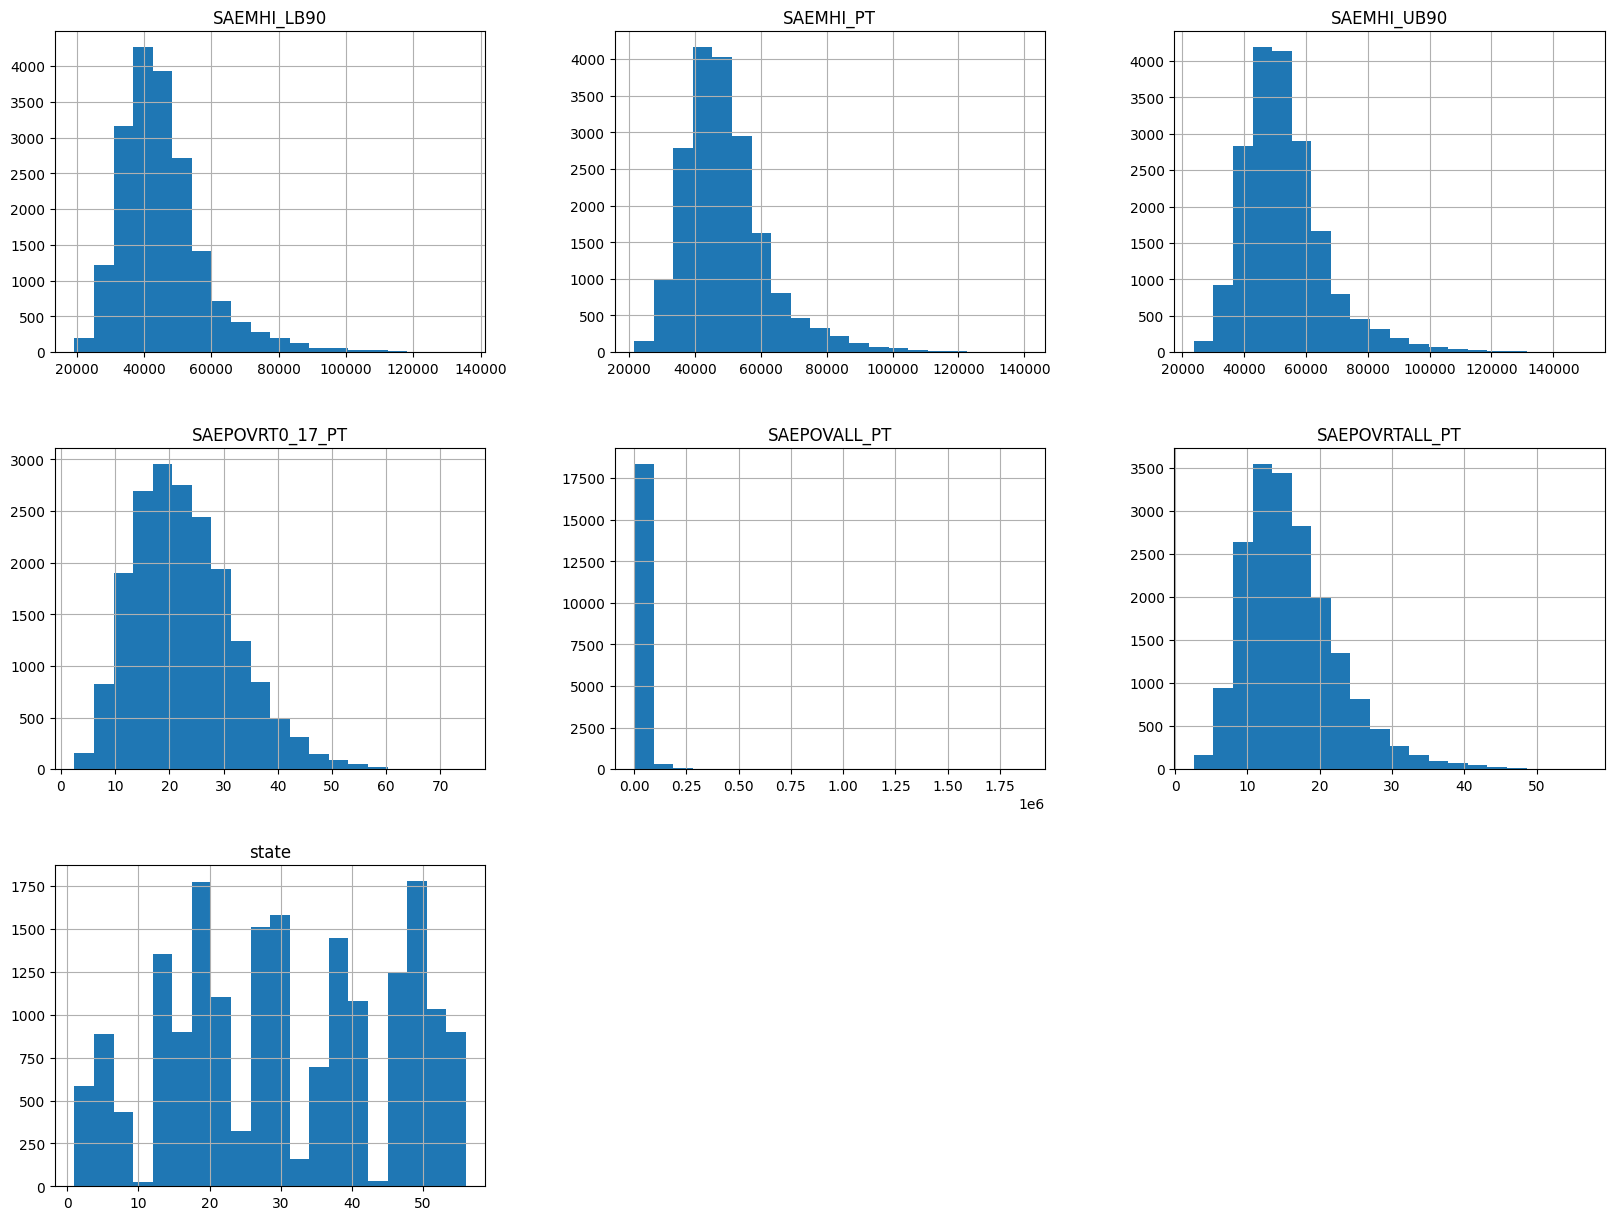

In [ ]:
# Visualize the distribution of each numeric variable using histograms
poverty_df.drop(['YEAR','STATE_NAME','ABV'],axis=1).hist(bins=20, figsize=(20, 15))
plt.show()


<ipython-input-33-7923bf724797>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



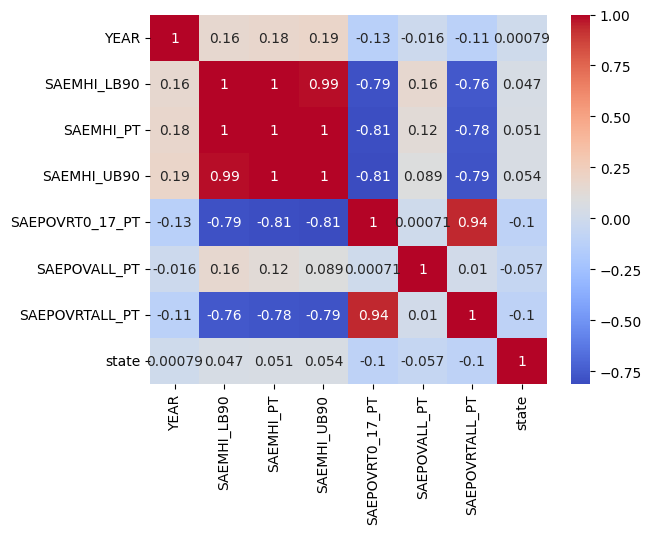

In [ ]:
# Create a correlation matrix to identify relationships between variables
corr_matrix = poverty_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


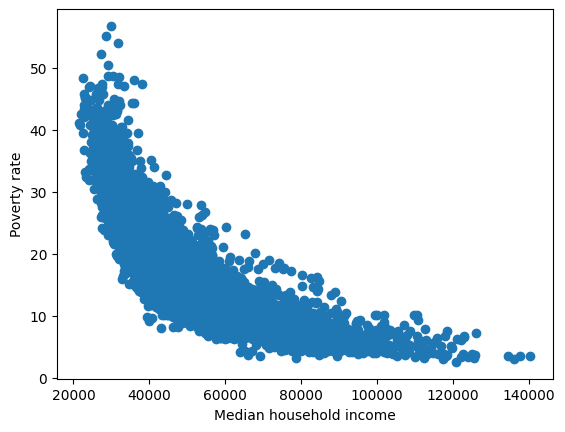

In [ ]:
# Visualize the relationship between poverty rate and median household income using a scatterplot
plt.scatter(x=poverty_df['SAEMHI_PT'], y=poverty_df['SAEPOVRTALL_PT'])
plt.xlabel('Median household income')
plt.ylabel('Poverty rate')
plt.show()

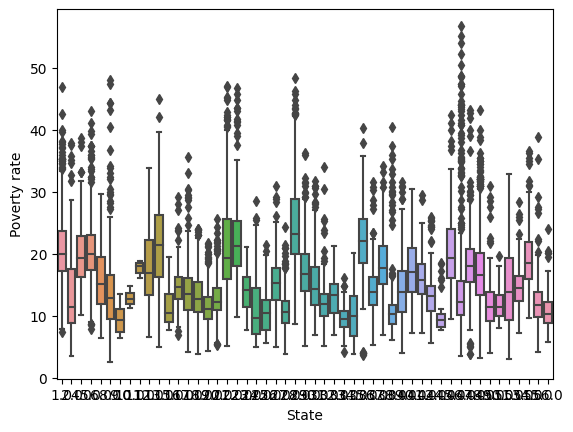

In [ ]:
# Visualize the distribution of poverty rates by state using a boxplot
sns.boxplot(x=poverty_df['state'], y=poverty_df['SAEPOVRTALL_PT'])
plt.xlabel('State')
plt.ylabel('Poverty rate')
plt.show()

visualize which state has the lowest income, which state has the highest income

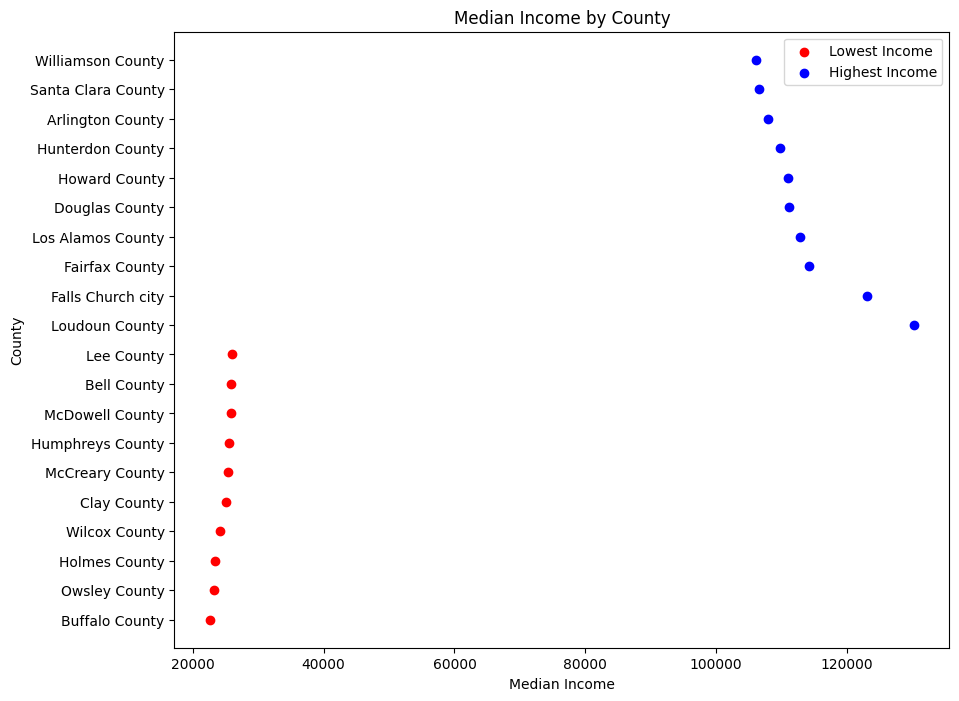

In [ ]:
lowest_income = poverty_df.groupby(['STATE_NAME', 'NAME'])['SAEMHI_PT'].median().sort_values().head(10)
highest_income = poverty_df.groupby(['STATE_NAME', 'NAME'])['SAEMHI_PT'].median().sort_values(ascending=False).head(10)

lowest_income = lowest_income.reset_index().set_index('STATE_NAME')
highest_income = highest_income.reset_index().set_index('STATE_NAME')

# Convert index to string
lowest_income.index = lowest_income.index.astype(str)
highest_income.index = highest_income.index.astype(str)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(lowest_income['SAEMHI_PT'], lowest_income['NAME'], c='red', label='Lowest Income')
ax.scatter(highest_income['SAEMHI_PT'], highest_income['NAME'], c='blue', label='Highest Income')

# Add labels and legend
ax.set_title('Median Income by County')
ax.set_xlabel('Median Income')
ax.set_ylabel('County')
ax.legend()
plt.show()


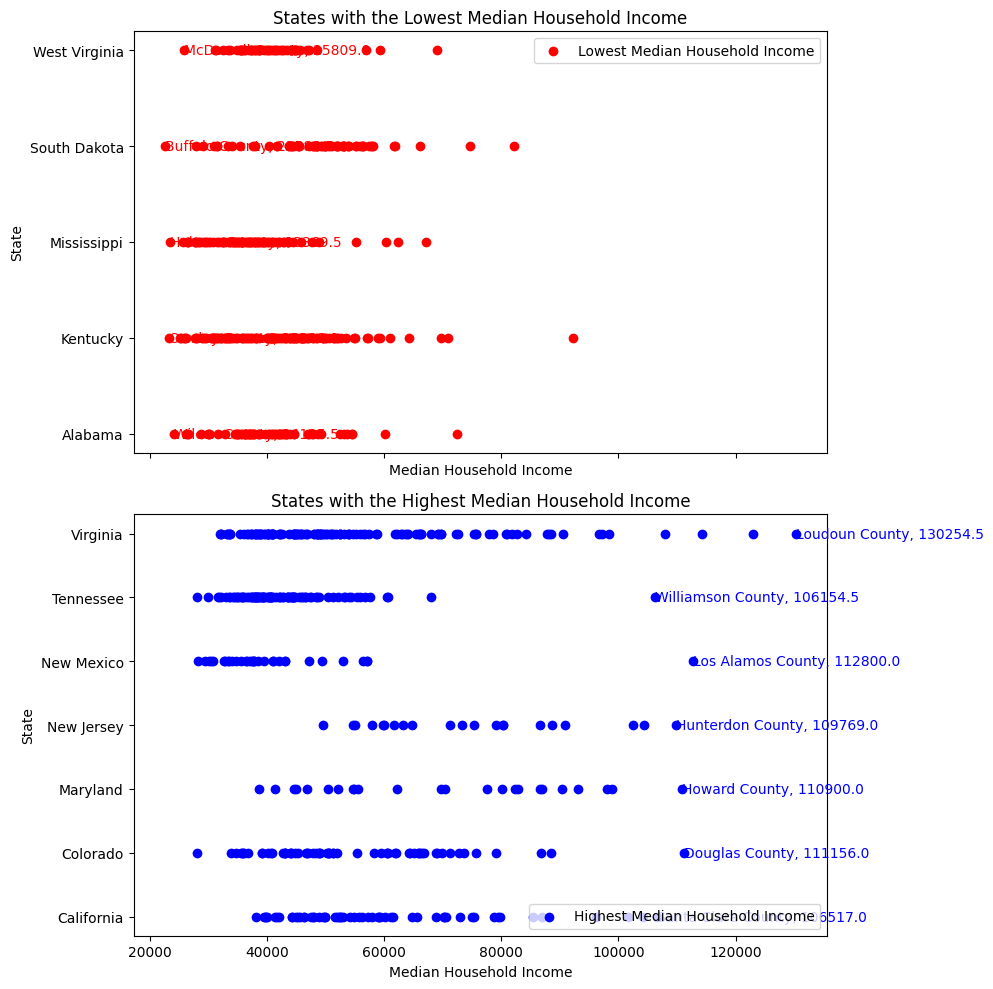

In [ ]:
# Group the data by state and county and get the median household income
poverty_by_county = poverty_df.groupby(['STATE_NAME', 'NAME'])['SAEMHI_PT'].median().reset_index()

# Get the 10 states with the lowest median household income
lowest_income_states = lowest_income.index.get_level_values('STATE_NAME').unique()

# Get the 10 states with the highest median household income
highest_income_states = highest_income.index.get_level_values('STATE_NAME').unique()

# Create a plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot the states with the lowest median household income
ax1.scatter(poverty_by_county[poverty_by_county['STATE_NAME'].isin(lowest_income_states)]['SAEMHI_PT'],
            poverty_by_county[poverty_by_county['STATE_NAME'].isin(lowest_income_states)]['STATE_NAME'],
            color='red', label='Lowest Median Household Income')

# Plot the counties with the lowest median household income in each state
for state in lowest_income_states:
    county = poverty_by_county[poverty_by_county['STATE_NAME'] == state].loc[poverty_by_county[poverty_by_county['STATE_NAME'] == state]['SAEMHI_PT'].idxmin()]['NAME']
    income = poverty_by_county[poverty_by_county['STATE_NAME'] == state].loc[poverty_by_county[poverty_by_county['STATE_NAME'] == state]['SAEMHI_PT'].idxmin()]['SAEMHI_PT']
    ax1.text(income, state, f"{county}, {income}", ha='left', va='center', color='red')

# Plot the states with the highest median household income
ax2.scatter(poverty_by_county[poverty_by_county['STATE_NAME'].isin(highest_income_states)]['SAEMHI_PT'],
            poverty_by_county[poverty_by_county['STATE_NAME'].isin(highest_income_states)]['STATE_NAME'],
            color='blue', label='Highest Median Household Income')

# Plot the counties with the highest median household income in each state
for state in highest_income_states:
    county = poverty_by_county[poverty_by_county['STATE_NAME'] == state].loc[poverty_by_county[poverty_by_county['STATE_NAME'] == state]['SAEMHI_PT'].idxmax()]['NAME']
    income = poverty_by_county[poverty_by_county['STATE_NAME'] == state].loc[poverty_by_county[poverty_by_county['STATE_NAME'] == state]['SAEMHI_PT'].idxmax()]['SAEMHI_PT']
    ax2.text(income, state, f"{county}, {income}", ha='left', va='center', color='blue')

# Add labels and legend
ax1.set_xlabel('Median Household Income')
ax1.set_ylabel('State')
ax1.set_title('States with the Lowest Median Household Income')
ax1.legend()
ax2.set_xlabel('Median Household Income')
ax2.set_ylabel('State')
ax2.set_title('States with the Highest Median Household Income')
ax2.legend()

plt.tight_layout()
plt.show()


:#### Injured vs killed data by state(red - killed, yellow - injured)

Text(0.5, 0, 'number of People get killed(red)/injured(yellow)')

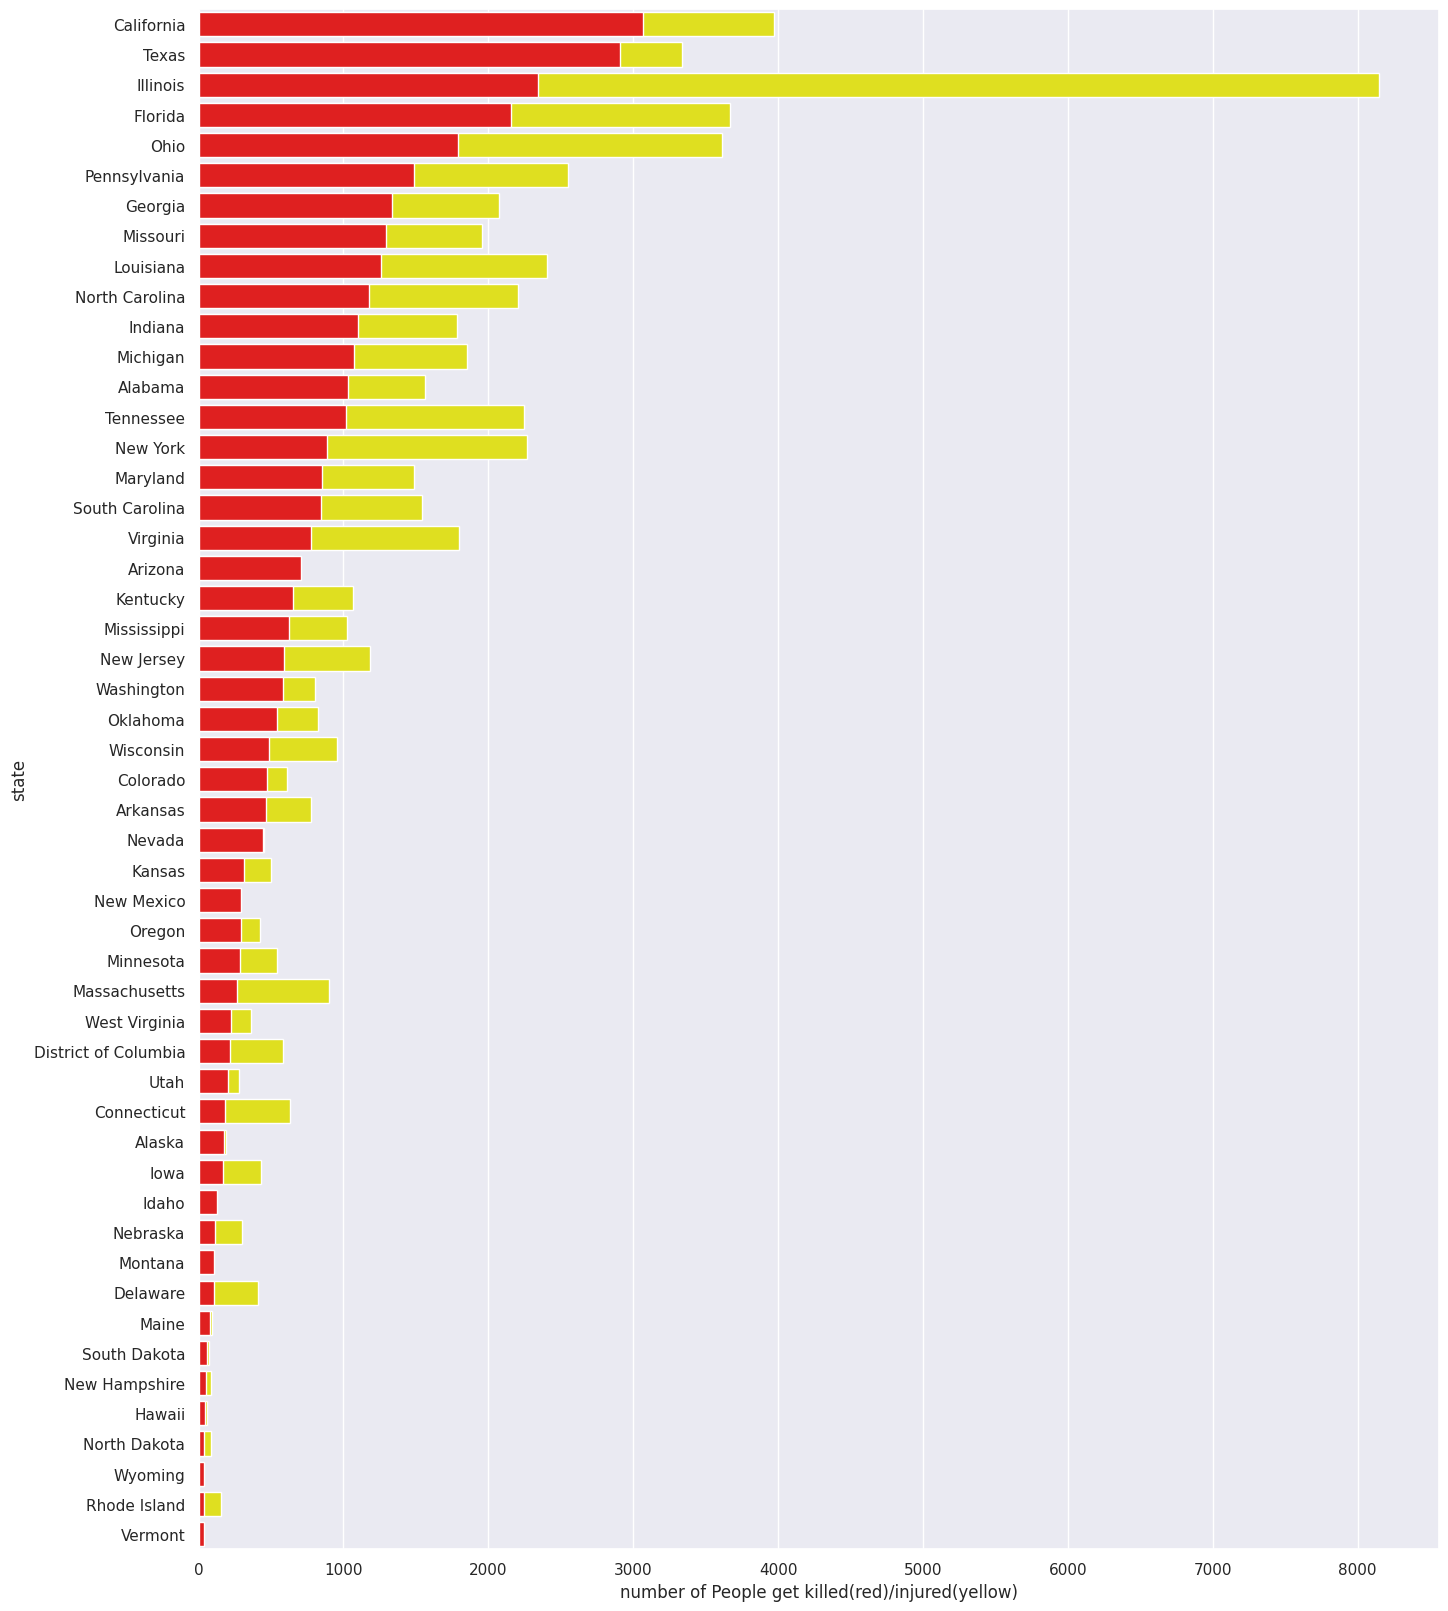

In [ ]:
plot_df = gun_df.groupby('state')[['n_killed', 'n_injured']].sum().sort_values(by=['n_killed'], ascending=False)
plot_df['state'] = plot_df.index

sns.set(rc={'figure.figsize':(16,20)})

sns.set_color_codes("muted")
sns.barplot(x="n_injured", y="state", data = plot_df, color="yellow")

sns.set_color_codes("deep")
sns.barplot(x="n_killed", y="state", data=plot_df, color="red")
plt.xlabel("number of People get killed(red)/injured(yellow)")

#### People killed by year in all state

Text(0, 0.5, 'number of people got killed')

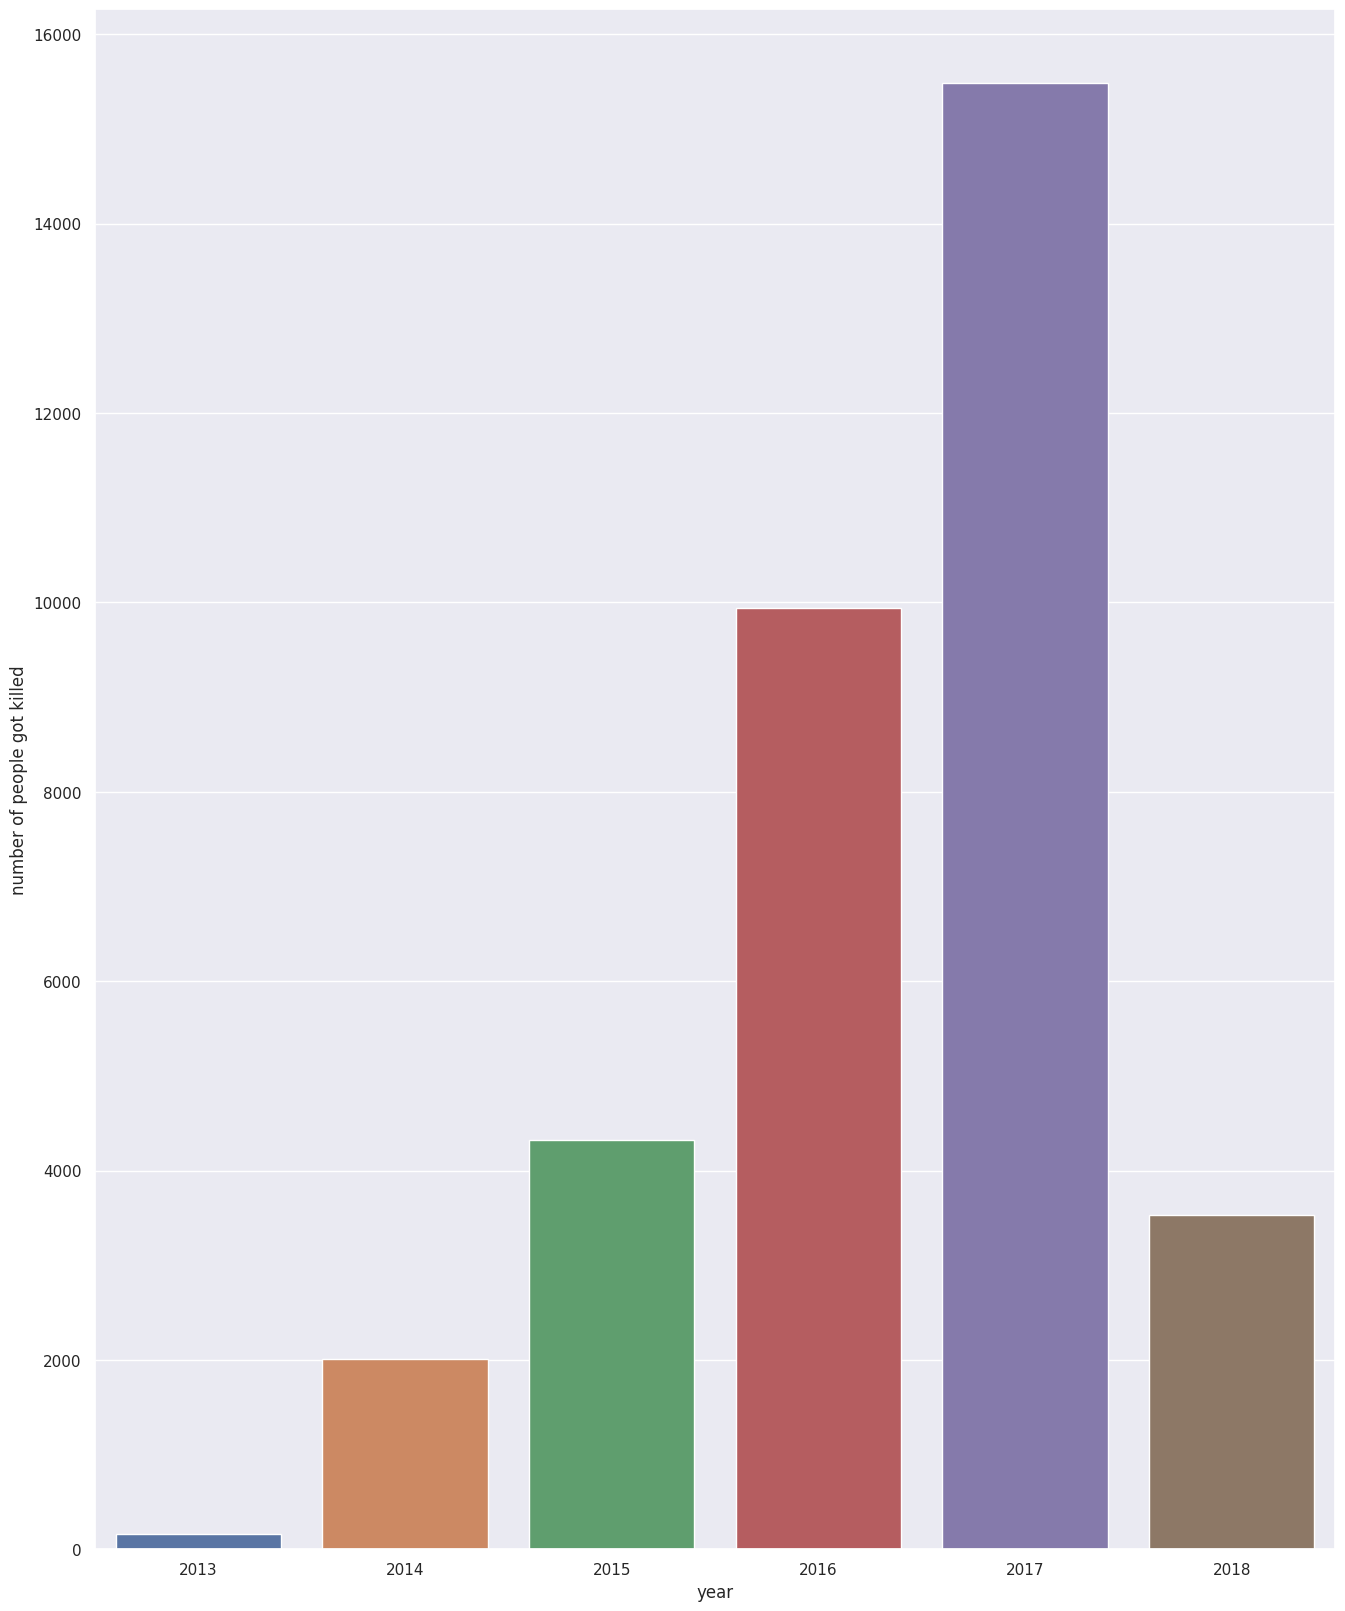

In [ ]:
gun_df['year'] = gun_df.date.dt.year
shaped_df = gun_df.groupby('year', as_index=False)[['n_killed','n_injured']].sum()
sns.barplot(x='year', y='n_killed', data=shaped_df, orient='v')
# sns.barplot(x='year', y='n_injured', data=shaped_df, orient='v')
plt.ylabel('number of people got killed')



#### State wise number of Gun Violence Incidents

In [ ]:
states_df = gun_df['state_code'].value_counts()

statesdf = pd.DataFrame()
statesdf['state_code'] = states_df.index
statesdf['counts'] = states_df.values

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesdf['state_code'],
        z = statesdf['counts'],
        locationmode = 'USA-states',
        text = statesdf['state_code'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Gun Violence Incidents")
        ) ]

layout = dict(
        title = 'State wise number of Gun Violence Incidents',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [ ]:

# Group gun_df by state and calculate sum of n_killed and n_injured for each state
state_totals = gun_df.groupby('state').agg({'n_killed': 'sum', 'n_injured': 'sum'})

# Filter to only include states in lowest_income and highest_income
states_to_include_low = list(lowest_income.index) 
states_to_include_high = list(highest_income.index)

state_total_low = state_totals[state_totals.index.isin(states_to_include_low)]
state_total_high = state_totals[state_totals.index.isin(states_to_include_high)]

# Print the results
print("Number of people get killed/injured in low income state")
print(state_total_low)
print("\nNumber of people get killed/injured in high income state")
print(state_total_high)


Number of people get killed/injured in low income state
               n_killed  n_injured
state                             
Alabama            1029       1562
Kentucky            649       1067
Mississippi         627       1024
South Dakota         59         70
West Virginia       221        362

Number of people get killed/injured in high income state
            n_killed  n_injured
state                          
California      3068       3971
Colorado         476        613
Maryland         854       1484
New Jersey       593       1184
New Mexico       296        283
Tennessee       1017       2249
Virginia         776       1798


We can't find a direct relationship, but in general, states with higher incomes have more casualties from shootings.

Then we are going to focus on the five states with the highest frequency of gun violence incidents: `IL`,`CA`,`FL`,`TX`,`OH`

<ipython-input-42-e7937f648a76>:18: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



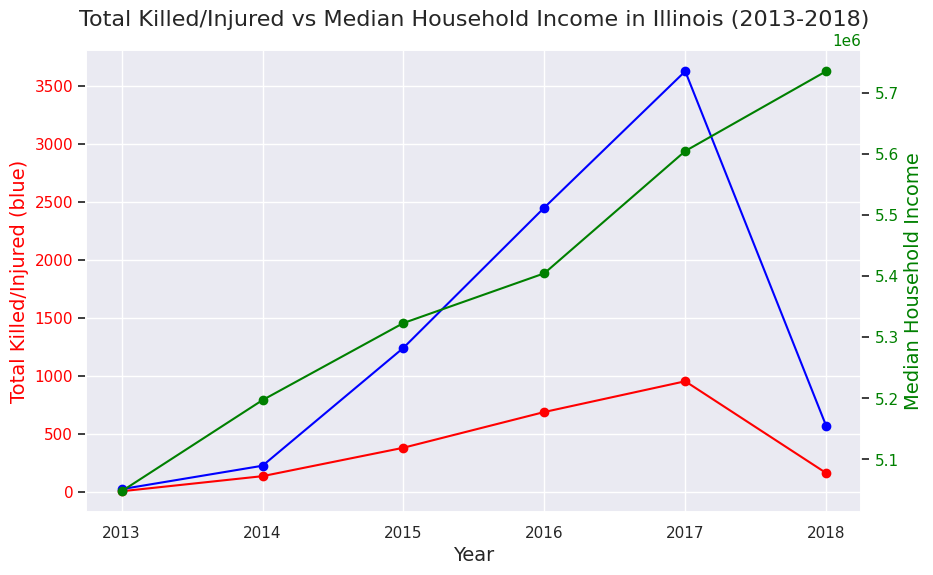

In [ ]:
year = [2013,2014,2015,2016,2017,2018]
# calculate total killed by year
kill_count = gun_df[gun_df['state'] == 'Illinois'].groupby('year')['n_killed'].sum()
injur_count = gun_df[gun_df['state'] == 'Illinois'].groupby('year')['n_injured'].sum()

# create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot the kill_count on ax1
ax1.plot(kill_count.index, kill_count, color='red', marker='o')
ax1.plot(injur_count.index, injur_count, color='blue', marker='o')
ax1.set_ylabel('Total Killed/Injured (blue)', fontsize=14, color='red')

# create a twin axis sharing the x-axis with ax1
ax2 = ax1.twinx()

# plot the median household income on ax2
ax2.plot(year, poverty_df[poverty_df['ABV'].str.contains('IL')].groupby('YEAR').sum()['SAEMHI_PT'], color='green', marker='o')
ax2.set_ylabel('Median Household Income', fontsize=14, color='green')

# set titles and labels
ax1.set_title('Total Killed/Injured vs Median Household Income in Illinois (2013-2018)', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax2.tick_params(axis='y', labelcolor='green')
ax1.tick_params(axis='y', labelcolor='red')

# add gridlines
ax1.grid(True)
ax2.grid(False)

plt.show()


<ipython-input-43-01f0817ce045>:18: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



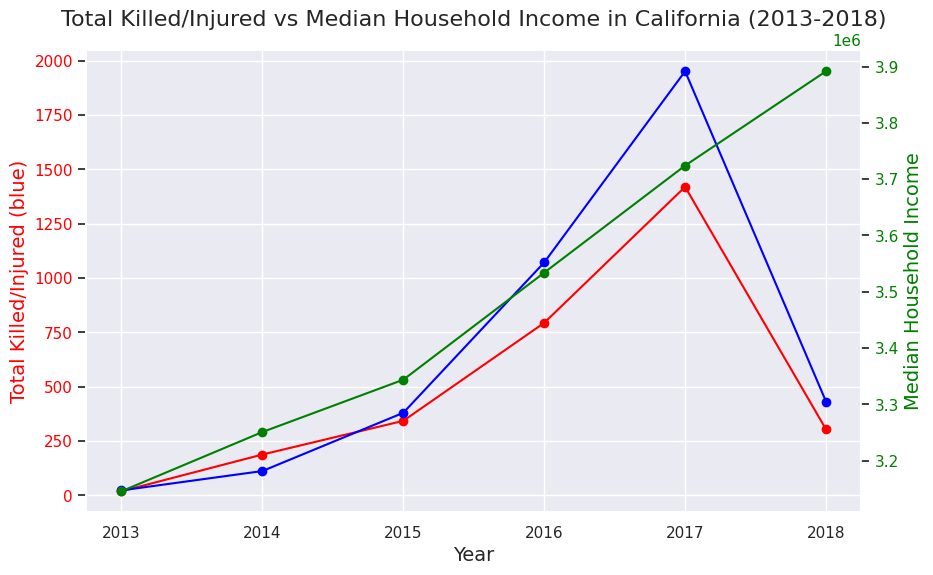

In [ ]:
year = [2013,2014,2015,2016,2017,2018]
# calculate total killed by year
kill_count = gun_df[gun_df['state'] == 'California'].groupby('year')['n_killed'].sum()
injur_count = gun_df[gun_df['state'] == 'California'].groupby('year')['n_injured'].sum()

# create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot the kill_count on ax1
ax1.plot(kill_count.index, kill_count, color='red', marker='o')
ax1.plot(injur_count.index, injur_count, color='blue', marker='o')
ax1.set_ylabel('Total Killed/Injured (blue)', fontsize=14, color='red')

# create a twin axis sharing the x-axis with ax1
ax2 = ax1.twinx()

# plot the median household income on ax2
ax2.plot(year, poverty_df[poverty_df['ABV'].str.contains('CA')].groupby('YEAR').sum()['SAEMHI_PT'], color='green', marker='o')
ax2.set_ylabel('Median Household Income', fontsize=14, color='green')

# set titles and labels
ax1.set_title('Total Killed/Injured vs Median Household Income in California (2013-2018)', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax2.tick_params(axis='y', labelcolor='green')
ax1.tick_params(axis='y', labelcolor='red')

# add gridlines
ax1.grid(True)
ax2.grid(False)

plt.show()


<ipython-input-44-adebc6dad53d>:18: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



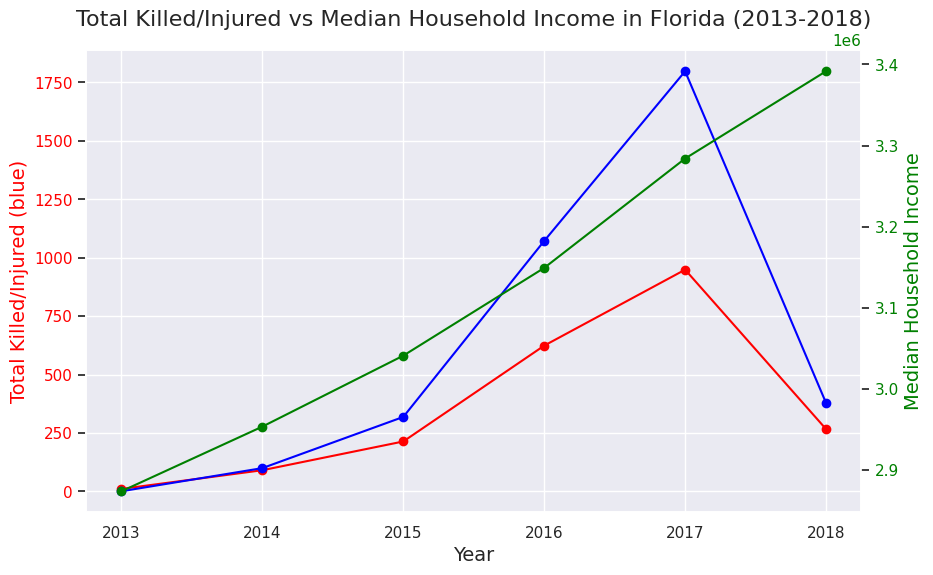

In [ ]:
year = [2013,2014,2015,2016,2017,2018]
# calculate total killed by year
kill_count = gun_df[gun_df['state'] == 'Florida'].groupby('year')['n_killed'].sum()
injur_count = gun_df[gun_df['state'] == 'Florida'].groupby('year')['n_injured'].sum()

# create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot the kill_count on ax1
ax1.plot(kill_count.index, kill_count, color='red', marker='o')
ax1.plot(injur_count.index, injur_count, color='blue', marker='o')
ax1.set_ylabel('Total Killed/Injured (blue)', fontsize=14, color='red')

# create a twin axis sharing the x-axis with ax1
ax2 = ax1.twinx()

# plot the median household income on ax2
ax2.plot(year, poverty_df[poverty_df['ABV'].str.contains('FL')].groupby('YEAR').sum()['SAEMHI_PT'], color='green', marker='o')
ax2.set_ylabel('Median Household Income', fontsize=14, color='green')

# set titles and labels
ax1.set_title('Total Killed/Injured vs Median Household Income in Florida (2013-2018)', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax2.tick_params(axis='y', labelcolor='green')
ax1.tick_params(axis='y', labelcolor='red')

# add gridlines
ax1.grid(True)
ax2.grid(False)

plt.show()


<ipython-input-45-2d7267dbcd5d>:18: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



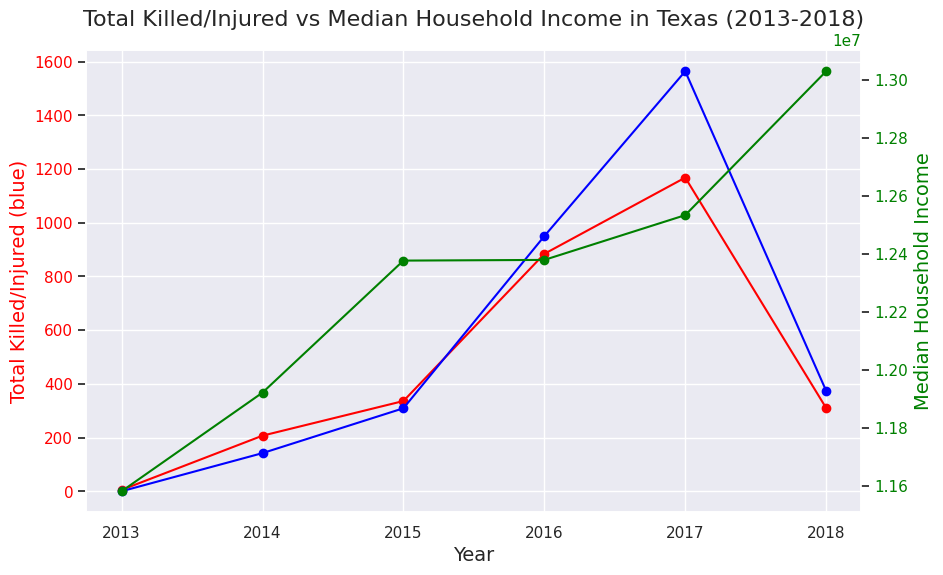

In [ ]:
year = [2013,2014,2015,2016,2017,2018]
# calculate total killed by year
kill_count = gun_df[gun_df['state'] == 'Texas'].groupby('year')['n_killed'].sum()
injur_count = gun_df[gun_df['state'] == 'Texas'].groupby('year')['n_injured'].sum()

# create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot the kill_count on ax1
ax1.plot(kill_count.index, kill_count, color='red', marker='o')
ax1.plot(injur_count.index, injur_count, color='blue', marker='o')
ax1.set_ylabel('Total Killed/Injured (blue)', fontsize=14, color='red')

# create a twin axis sharing the x-axis with ax1
ax2 = ax1.twinx()

# plot the median household income on ax2
ax2.plot(year, poverty_df[poverty_df['ABV'].str.contains('TX')].groupby('YEAR').sum()['SAEMHI_PT'], color='green', marker='o')
ax2.set_ylabel('Median Household Income', fontsize=14, color='green')

# set titles and labels
ax1.set_title('Total Killed/Injured vs Median Household Income in Texas (2013-2018)', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax2.tick_params(axis='y', labelcolor='green')
ax1.tick_params(axis='y', labelcolor='red')

# add gridlines
ax1.grid(True)
ax2.grid(False)

plt.show()


<ipython-input-46-b840c6f3e90d>:18: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



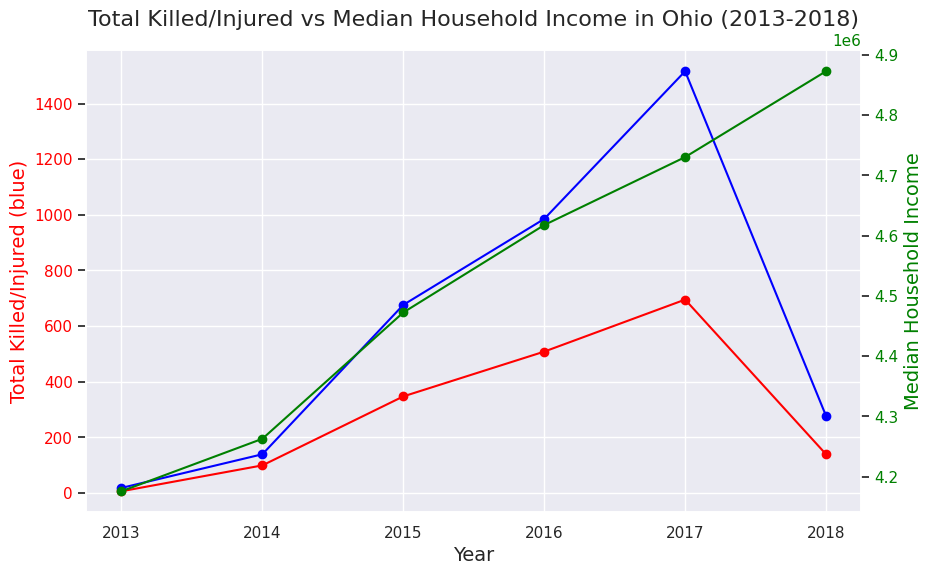

In [ ]:
year = [2013,2014,2015,2016,2017,2018]
# calculate total killed by year
kill_count = gun_df[gun_df['state'] == 'Ohio'].groupby('year')['n_killed'].sum()
injur_count = gun_df[gun_df['state'] == 'Ohio'].groupby('year')['n_injured'].sum()

# create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot the kill_count on ax1
ax1.plot(kill_count.index, kill_count, color='red', marker='o')
ax1.plot(injur_count.index, injur_count, color='blue', marker='o')
ax1.set_ylabel('Total Killed/Injured (blue)', fontsize=14, color='red')

# create a twin axis sharing the x-axis with ax1
ax2 = ax1.twinx()

# plot the median household income on ax2
ax2.plot(year, poverty_df[poverty_df['ABV'].str.contains('OH')].groupby('YEAR').sum()['SAEMHI_PT'], color='green', marker='o')
ax2.set_ylabel('Median Household Income', fontsize=14, color='green')

# set titles and labels
ax1.set_title('Total Killed/Injured vs Median Household Income in Ohio (2013-2018)', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax2.tick_params(axis='y', labelcolor='green')
ax1.tick_params(axis='y', labelcolor='red')

# add gridlines
ax1.grid(True)
ax2.grid(False)

plt.show()


Gender comparison of the number of people involved in gun violence

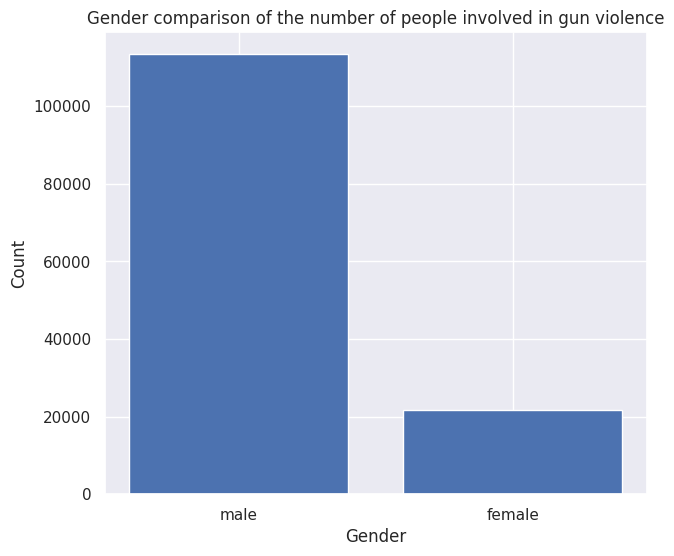

In [ ]:
# Bar chart for male vs female
fig, ax_gender = plt.subplots(figsize=(7, 6))
male_female_counts = gun_df[['male', 'female']].sum()
ax_gender.bar(male_female_counts.index, male_female_counts.values)
ax_gender.set_xlabel('Gender')
ax_gender.set_ylabel('Count')
ax_gender.set_title('Gender comparison of the number of people involved in gun violence')
plt.show()

Age group comparison of the number of people involved in gun violence

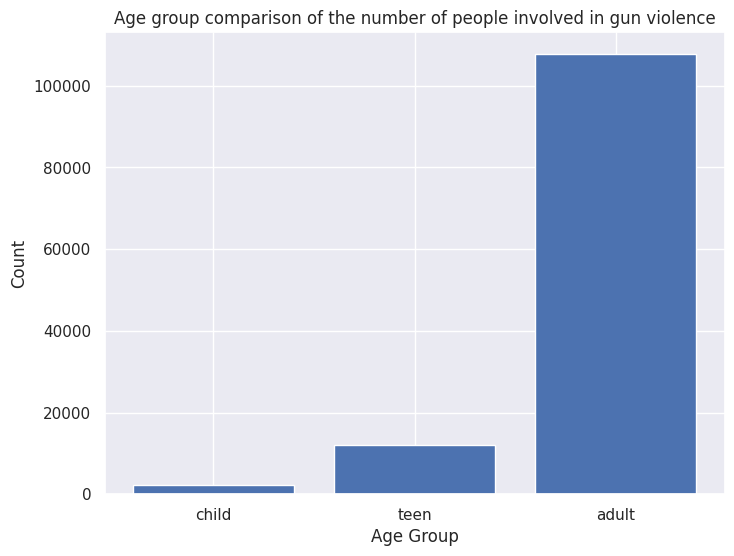

In [ ]:
# Bar chart for child vs teen vs adult
fig, ax_age = plt.subplots(figsize=(8, 6))
age_group_counts = gun_df[['child', 'teen', 'adult']].sum()
ax_age.bar(age_group_counts.index, age_group_counts.values)
ax_age.set_xlabel('Age Group')
ax_age.set_ylabel('Count')
ax_age.set_title('Age group comparison of the number of people involved in gun violence')
plt.show()